<a href="https://colab.research.google.com/github/1900690/koukai/blob/main/mite_demo_0.2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#写真の撮り方


*   一枚の葉のみが写るようにしてください
*   葉全体にピントが合うように撮影してください
*   画質は3120×4160を想定しています。
*   画像の向きは関係ありません


撮影例

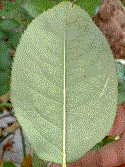

#使い方
##①検出アプリの使い方
1.   ”事前準備”と書いてあるところを一回クリック（もしくはタップ）しShift+Enter（もしくはスクリーンショット (3).pngをタップ)
2.    "検出する害虫を選択"の害虫の種類を選択し、Shift+Enter（もしくはスクリーンショット (3).pngをタップ)
3.   "画像を取り込み"の画像のアップロード方法を選択し、Shift+Enter（もしくはスクリーンショット (3).pngをタップ)
4.   ”検出を行う”と書いてあるところを一回クリック（もしくはタップ）しShift+Enter（もしくはスクリーンショット (3).pngをタップ)
5.   画像をダウンロードする場合は”検出後の画像とダニの数を示したテキストファイルをダウンロード”と書いてあるところを一回クリック（もしくはタップ）しShift+Enter（もしくはスクリーンショット (3).pngをタップ)

##②図作成アプリの使い方
1.   "テキストファイルのアップロード"の画像のアップロード方法を選択し、Shift+Enter（もしくはスクリーンショット (3).pngをタップ)
1.   "画像の枚数と撮影方向を指定"のドロップダウンから設定を選択し、Shift+Enter（もしくはスクリーンショット (3).pngをタップ)
3.   画像をダウンロードする場合は”図をダウンロード”と書いてあるところを一回クリック（もしくはタップ）しShift+Enter（もしくはスクリーンショット (3).pngをタップ)
##使用後はアンケートにご協力ください

#検出アプリ

In [ ]:
#@title 事前準備 { display-mode: "form" }
#@markdown [不明な理由により、セッションがクラッシュしました。]と表示されますが、無視してください
from IPython.utils import io
import os
import subprocess
import tqdm.notebook

TQDM_BAR_FORMAT = '{l_bar}{bar}| {n_fmt}/{total_fmt} [elapsed: {elapsed} remaining: {remaining}]'

try:
  with tqdm.notebook.tqdm(total=100, bar_format=TQDM_BAR_FORMAT) as pbar:
    with io.capture_output() as captured:
      import shutil
      import os
      pbar.update(5)
      %cd -q '/content/'
      if os.path.exists('/content/rose-mite.pt'):
          os.remove('/content/rose-mite.pt')
      if os.path.exists('/content/demo_img.jpg'):
          os.remove('/content/demo_img.jpg')
      # Download trained weights
      !wget -q https://github.com/1900690/koukai/releases/download/demo/rose-mite.pt
      !wget -q https://github.com/1900690/koukai/releases/download/demo/demo_img.jpg
      pbar.update(5)
      
      #必要なライブラリをインポート
      !pip -q install rembg
      pbar.update(30)
      %pip -q install ultralytics
      pbar.update(30)
      !pip -q install omegaconf
      pbar.update(20)
      !pip -q install japanize_matplotlib
      pbar.update(10)

except subprocess.CalledProcessError:
  print(captured)
  raise

exit()

  0%|          | 0/100 [elapsed: 00:00 remaining: ?]

In [ ]:
#@title 検出する害虫を選択 { display-mode: "form" }
害虫の名前 = 'バラのダニ' #@param ["バラのダニ", "キクのダニ（準備中）","ガーベラのコナジラミ（準備中）"]

from IPython.utils import io
import os
import subprocess
import tqdm.notebook

TQDM_BAR_FORMAT = '{l_bar}{bar}| {n_fmt}/{total_fmt} [elapsed: {elapsed} remaining: {remaining}]'
try:
  with tqdm.notebook.tqdm(total=100, bar_format=TQDM_BAR_FORMAT) as pbar:
    with io.capture_output() as captured:
        #モデルを選択
        if 害虫の名前 == 'バラのダニ':
          x_split_number=20
          y_split_number=20
          
        elif 害虫の名前 =='キクのダニ（準備中）':
          x_split_number=20
          y_split_number=20
          
        elif 害虫の名前 =='ガーベラのコナジラミ（準備中）':
          x_split_number=20
          y_split_number=20

        #必要な関数を定義
        def rot_cut(src_img, deg, center, size):
            rot_mat = cv2.getRotationMatrix2D(center, deg, 1.0)
            rot_mat[0][2] += -center[0]+size[0]/2 # -(元画像内での中心位置)+(切り抜きたいサイズの中心)
            rot_mat[1][2] += -center[1]+size[1]/2 # 同上
            return cv2.warpAffine(src_img, rot_mat, size)

        def pil2cv(image):
            ''' PIL型 -> OpenCV型 '''
            new_image = np.array(image, dtype=np.uint8)
            if new_image.ndim == 2:  # モノクロ
                pass
            elif new_image.shape[2] == 3:  # カラー
                new_image = new_image[:, :, ::-1]
            elif new_image.shape[2] == 4:  # 透過
                new_image = new_image[:, :, [2, 1, 0, 3]]
            return new_image
            
        
        #テスト画像で背景処理をし、後の作業を早くする
        import cv2
        from rembg import remove
        pbar.update(80)
        remove(cv2.imread("/content/demo_img.jpg"))
        pbar.update(20)

except subprocess.CalledProcessError:
  print(captured)
  raise

  0%|          | 0/100 [elapsed: 00:00 remaining: ?]

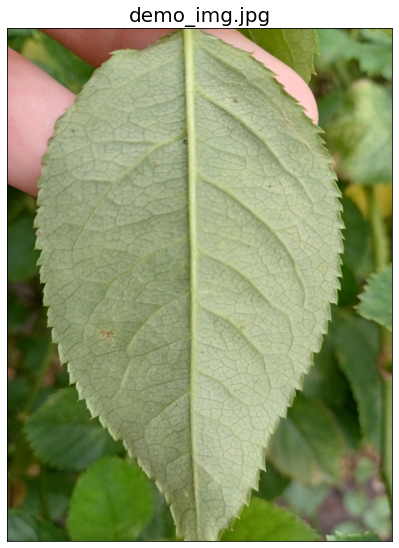

In [ ]:
#@title 画像を取り込み { display-mode: "form" }
画像のアップロード方法を選択してください= '\u30B5\u30F3\u30D7\u30EB\u753B\u50CF\u3067\u691C\u51FA' #@param ["サンプル画像で検出", "画像をアップロード", "インカメラで画像を撮影", "アウトカメラで画像を撮影"]

import os
import shutil
import datetime
dt_now = datetime.datetime.now()
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
from glob import glob
import matplotlib.pyplot as plt
#表示用関数定義
def show_images_glob(images, figsize=(40,20), columns = 5):
  plt.figure(figsize=figsize)
  for i, image in enumerate(images):
      plt.subplot(len(images) / columns + 1, columns, i + 1)
      plt.title(image[24:], loc='center',fontsize=20)
      plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False,bottom=False, left=False, right=False, top=False)
      plt.imshow(cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2RGB))
#インカメラ用関数定義
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.facingMode ='user';
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

#アウトカメラ用関数定義
def take_photo_out(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video:{facingMode:{exact:"environment"}}});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.facingMode ='environment';
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

if 画像のアップロード方法を選択してください== 'サンプル画像で検出':
    if os.path.exists('/content/originals_test'):
      shutil.rmtree('/content/originals_test')
    if not os.path.exists('/content/originals_test/'):
      os.makedirs('/content/originals_test/')
    
    shutil.copy('/content/demo_img.jpg','/content/originals_test/demo_img.jpg')

    SOURCE_IMAGES = "/content/originals_test"
    FILE_PATTERN = "*.jpg" #ワイルドカードでフィルタリング
    images = glob(os.path.join(SOURCE_IMAGES, FILE_PATTERN))

    show_images_glob(images)


elif 画像のアップロード方法を選択してください== "画像をアップロード" :
  if os.path.exists('/content/originals_test'):
    shutil.rmtree('/content/originals_test')

  if not os.path.exists('/content/originals_test/'):
      os.makedirs('/content/originals_test/')

  %cd -q '/content/originals_test/'

  from google.colab import files
  uploaded = files.upload()

  SOURCE_IMAGES = "/content/originals_test"
  FILE_PATTERN = "*.jpg" #ワイルドカードでフィルタリング
  images = glob(os.path.join(SOURCE_IMAGES, FILE_PATTERN))

  show_images_glob(images)

elif 画像のアップロード方法を選択してください== 'インカメラで画像を撮影':
    #if os.path.exists('/content/originals_test'):
    #  shutil.rmtree('/content/originals_test')

    if not os.path.exists('/content/originals_test/'):
      os.makedirs('/content/originals_test/')
    
    %cd -q '/content'

    from IPython.display import Image
    try:
      filename = take_photo()
      title=dt_now.strftime('%Y%m%d_%H%M%S_000')

      #print('Saved to {}'.format(title+".jpg"))
      
      # Show the image which was just taken.
      #display(Image(filename))
    except Exception as err:
      # Errors will be thrown if the user does not have a webcam or if they do not
      # grant the page permission to access it.
      print(str(err))
    shutil.move('/content/photo.jpg', '/content/originals_test/'+title+".jpg")
    SOURCE_IMAGES = "/content/originals_test"
    FILE_PATTERN = "*.jpg" #ワイルドカードでフィルタリング
    images = glob(os.path.join(SOURCE_IMAGES, FILE_PATTERN))

    show_images_glob(images)
else:
      #if os.path.exists('/content/originals_test'):
    #  shutil.rmtree('/content/originals_test')

    if not os.path.exists('/content/originals_test/'):
      os.makedirs('/content/originals_test/')
    
    %cd -q '/content'

    from IPython.display import Image
    try:
      filename = take_photo_out()
      title=dt_now.strftime('%Y%m%d_%H%M%S_000')

      #print('Saved to {}'.format(title+".jpg"))
      
      # Show the image which was just taken.
      #display(Image(filename))
    except Exception as err:
      # Errors will be thrown if the user does not have a webcam or if they do not
      # grant the page permission to access it.
      #print(str(err))
      print("")
    if not os.path.exists('/content/photo.jpg'):
        print("アウトカメラがありません")
    else:
      shutil.move('/content/photo.jpg', '/content/originals_test/'+title+".jpg")
      SOURCE_IMAGES = "/content/originals_test"
      FILE_PATTERN = "*.jpg" #ワイルドカードでフィルタリング
      images = glob(os.path.join(SOURCE_IMAGES, FILE_PATTERN))

      show_images_glob(images)


  0%|          | 0/100 [elapsed: 00:00 remaining: ?]

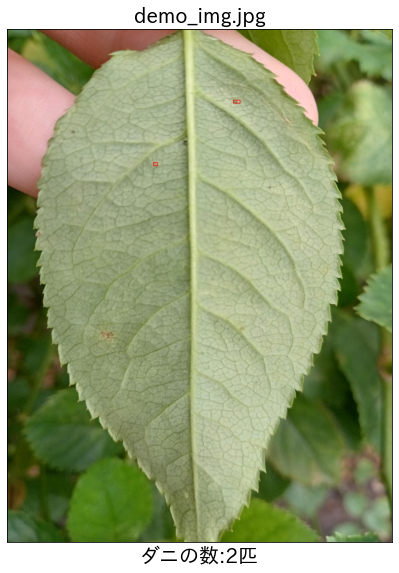

In [ ]:
#@title 検出を行う { display-mode: "form" }

#ライブラリのインポート
from IPython.utils import io
import subprocess
import tqdm.notebook
import cv2
import glob
import matplotlib.pyplot as plt
import os
import japanize_matplotlib
japanize_matplotlib.japanize()
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import ultralytics
import shutil

TQDM_BAR_FORMAT = '{l_bar}{bar}| {n_fmt}/{total_fmt} [elapsed: {elapsed} remaining: {remaining}]'

try:
  with tqdm.notebook.tqdm(total=100, bar_format=TQDM_BAR_FORMAT) as pbar:
    with io.capture_output() as captured:
      #★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
      #背景処理
      #フォルダを空にする
      if not os.path.exists('/content/originals/'):
        shutil.copytree('/content/originals_test/','/content/originals/')
        shutil.rmtree('/content/originals_test/')
        os.mkdir('/content/originals_test/')

      if not os.path.exists('/content/originals_test/'):
        os.mkdir('/content/originals_test/')

      #元画像のリストを作成
      read_folda_name='/content/originals/'
      read_folda = sorted(os.listdir(read_folda_name))

      #背景処理を行う
      for imgname in read_folda:
        input = cv2.imread('/content/originals/'+imgname)
        output = remove(input)
        cv2.imwrite('/content/originals_test/'+imgname, output)
      pbar.update(8)
      #★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
      #画像を分割して葉が映っているもののみ保存

      split_x=x_split_number
      split_y=y_split_number

      #'NoneType' object is not subscriptableといわれるので先にipynb_checkpointsを消す
      !rm -rf `find -type d -name .ipynb_checkpoints`

      #画像分割先のフォルダを作成
      if os.path.exists('/content/split_pic_original_reaf/'):
        shutil.rmtree('/content/split_pic_original_reaf/')
      if not os.path.exists('/content/split_pic_original_reaf/'):
        os.makedirs('/content/split_pic_original_reaf/')

      #画像の読み込み
      read_files_name='/content/originals_test/'
      read_files = os.listdir(read_files_name)

      for file_name in read_files:
        fname = read_files_name+file_name 
        foldaname=fname[9:]
        img=cv2.imread(fname,cv2.IMREAD_COLOR)

        #画像の大きさを抽出
        h,w=img.shape[:2]

        #画像の分割処理
        cx=0
        cy=0
        for j in range(split_x):
            for i in range(split_y):
                split_pic=img[cy:cy+int(h/split_y),cx:cx+int(w/split_x),:]
                #背景の黒を除外
                b = split_pic.T[0].flatten().mean()
                g = split_pic.T[1].flatten().mean()
                r = split_pic.T[2].flatten().mean()
                average=b+r+g
                if average>0:
                  cv2.imwrite("/content/split_pic_original_reaf/"+file_name[:-4]+'_y'+str('{0:02d}'.format(int(i)))+'_x'+str('{0:02d}'.format(int(j)))+foldaname[-4:],split_pic)
                cy=cy+int(h/split_y)
            cy=0
            cx=cx+int(w/split_x)
      pbar.update(8)
      #★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
      #検出1回目
      if os.path.exists('/content/runs/detect/predict'):
          shutil.rmtree('/content/runs/detect/predict')

      if 害虫の名前 == 'バラのダニ':
            !yolo task=detect mode=predict model="/content/rose-mite.pt" conf=0.01 source='/content/split_pic_original_reaf/' save_txt=True save_conf=True
      elif 害虫の名前 =='キクのダニ（準備中）':
            !yolo task=detect mode=predict model="/content/rose-mite.pt" conf=0.01 source='/content/split_pic_original_reaf/' save_txt=True save_conf=True
      elif 害虫の名前 =='ガーベラのコナジラミ（準備中）':
            !yolo task=detect mode=predict model="/content/rose-mite.pt" conf=0.01 source='/content/split_pic_original_reaf/' save_txt=True save_conf=True
      
      pbar.update(32)
      #★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
      #ダニの候補を切り取って保存

      #切り取った画像の入れ場所を作る
      if os.path.exists("/content/second_cut"):
        shutil.rmtree("/content/second_cut")
      if not os.path.exists("/content/second_cut"):
        os.mkdir("/content/second_cut")
      #座標情報を読み込み
      read_files_name_bbox='/content/runs/detect/predict/labels/*'
      read_files_bbox = sorted(glob.glob(read_files_name_bbox))

      for txt_name in read_files_bbox:
        #座標情報の中身を読み込み
        txt_file = pd.read_csv(txt_name,header=None, sep=" ")
        for i in range(len(txt_file[0])):
          #座標からそれぞれのダニの中心点を算出
          im = Image.open('/content/runs/detect/predict/'+txt_name[36:-4]+".jpg")
          im_original = Image.open('/content/originals_test/'+txt_name[36:-12]+".jpg")
          image_height,image_width=np.array(im).shape[:2]
          image_height_original,image_width_original=np.array(im_original).shape[:2]
          name=txt_name[30:]
          y_number=int(txt_name[-10:-8])
          x_number=int(txt_name[-6:-4])

          x_center=float(txt_file[1][i])*image_width
          y_center=float(txt_file[2][i])*image_height
          width=float(txt_file[3][i])*image_width
          height=float(txt_file[4][i])*image_height

          x1=(x_center-width/2)
          y1=(y_center-height/2)
          x2=(x_center+width/2)
          y2=(y_center+height/2)

          x_min_original=x1+image_width*x_number
          y_min_original=y1+image_height*y_number
          x_max_original=x2+image_width*x_number
          y_max_original=y2+image_height*y_number

          absolute_x_original=x_min_original+(x_max_original-x_min_original)/2
          absolute_y_original=y_min_original+(y_max_original-y_min_original)/2
          absolute_width_original=x_max_original-x_min_original
          absolute_height_original=y_max_original-y_min_original

          #中心で切り取って保存
          test_img=rot_cut(np.array(im_original), 0,(int(absolute_x_original),int(absolute_y_original)),(int(image_width),int(image_height)))
          test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
          cv2.imwrite('/content/second_cut/'+txt_name[36:-4]+"_"+str('{0:04d}'.format(int(absolute_x_original)))+"_"+str('{0:04d}'.format(int(absolute_y_original)))+'.jpg',test_img)
      pbar.update(10)
      #★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
      #検出2回目
      if os.path.exists('/content/runs/detect/predict2'):
        shutil.rmtree('/content/runs/detect/predict2')

      if 害虫の名前 == 'バラのダニ':
            !yolo task=detect mode=predict model="/content/rose-mite.pt" conf=0.4 source='/content/second_cut/' save_txt=True save_conf=True
      elif 害虫の名前 =='キクのダニ（準備中）':
            !yolo task=detect mode=predict model="/content/rose-mite.pt" conf=0.4 source='/content/second_cut/' save_txt=True save_conf=True
      elif 害虫の名前 =='ガーベラのコナジラミ（準備中）':
            !yolo task=detect mode=predict model="/content/rose-mite.pt" conf=0.4 source='/content/second_cut/' save_txt=True save_conf=True
      pbar.update(10)
      #★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
      #重なりを除去する

      #画像の保存場所
      if os.path.exists("/content/test_brack/"):
        shutil.rmtree("/content/test_brack/")
      if not os.path.exists("/content/test_brack/"):
          os.mkdir("/content/test_brack/")

      read_files_name_bbox_brack='/content/originals_test/*'
      read_files_bbox_brack = sorted(glob.glob(read_files_name_bbox_brack))
      #devidedmite判定用0のみの行列を作成
      for txt_name_brack in read_files_bbox_brack:
        image_width_original,image_height_original=np.array(Image.open(txt_name_brack)).shape[:2]
        #8bit(0～255)で黒い画像を作成
        img_brack = Image.new("L", (image_height_original,image_width_original),0)
        img_brack.save('/content/test_brack/'+txt_name_brack[24:-4]+'.png')

      #座標のリストを読み込み
      read_files_name_bbox='/content/runs/detect/predict2/labels/*'
      read_files_bbox = sorted(glob.glob(read_files_name_bbox))
      for txt_name in read_files_bbox:
        #座標を読み込み
        txt_file = pd.read_csv(txt_name,header=None, sep=" ")
        for i in range(len(txt_file[0])):
          #座標を計算して求める
          im = Image.open('/content/runs/detect/predict2/'+txt_name[36:-4]+".jpg")
          im_original = Image.open('/content/originals/'+txt_name[36:-22]+".jpg")
          image_height,image_width=np.array(im).shape[:2]
          image_height_original,image_width_original=np.array(im_original).shape[:2]
          name=txt_name[37:]
          y_centerpoint=int(txt_name[-8:-4])
          x_centerpoint=int(txt_name[-13:-9])

          x_center=float(txt_file[1][i])*image_width
          y_center=float(txt_file[2][i])*image_height
          width=float(txt_file[3][i])*image_width
          height=float(txt_file[4][i])*image_height

          x_min_edge=x_center-width/2
          y_min_edge=y_center-height/2
          x_max_edge=x_center+width/2
          y_max_edge=y_center+height/2


          #画像の端にある座標を検出
          end_detect_x = [int(x_min_edge),int(x_max_edge)]
          end_detect_y = [int(y_min_edge),int(y_max_edge)]
          n = sum(1 for x in end_detect_x if x<=0 or x>=image_width)
          m = sum(1 for x in end_detect_y if x<=0 or x>=image_height)
          #端にある座標は除外する
          if n+m==0:
            x0point=x_centerpoint-image_width/2
            y0point=y_centerpoint-image_height/2

            x_min_original=x0point+x_center-width/2
            y_min_original=y0point+y_center-height/2
            x_max_original=x0point+x_center+width/2
            y_max_original=y0point+y_center+height/2

            absolute_x_original=x_min_original+(x_max_original-x_min_original)/2
            absolute_y_original=y_min_original+(y_max_original-y_min_original)/2
            absolute_width_original=x_max_original-x_min_original
            absolute_height_original=y_max_original-y_min_original

            #複数検出を分けるためにダニの座標を黒紙に重ねていく
            img_brack=np.array(Image.open('/content/test_brack/'+txt_name[36:-22]+'.png'))
            brack_height,brack_width=img_brack.shape[:2]
            img_brack_temp=np.zeros((brack_height,brack_width), dtype=np.int8)
            img_brack_temp[int(y_min_original):int(y_max_original), int(x_min_original):int(x_max_original)] = 1
            img_brack_test=img_brack_temp+img_brack
            #極端に細い(一辺が10ピクセル以下)場合には座標を追加しない
            if absolute_width_original>10 and absolute_height_original>10:
                Image.fromarray(img_brack_test).save('/content/test_brack/'+txt_name[36:-22]+'.png')
      pbar.update(20)
      #★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
      #マスクから座標を取得

      #座標ファイルの出力場所
      yolo_pass="/content/originals_test_annotations/"
      if os.path.exists('/content/originals_test_annotations/'):
        shutil.rmtree('/content/originals_test_annotations/')
      if not os.path.exists(yolo_pass):
          os.mkdir(yolo_pass)

      #maskフォルダのリストを取得
      LOAD_FOLDA = '/content/test_brack/'
      LOAD_NAME = sorted(os.listdir(LOAD_FOLDA))

      #マスクから座標を作成
      for file_name in LOAD_NAME:

        im = np.array(Image.open(LOAD_FOLDA+file_name))
        img = np.where(im > 0, 1, 0)
        image_height,image_width=im.shape[:2]
        
        contours, hierarchy = cv2.findContours(pil2cv(img), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE ) 

        for i in range(len(contours)):
          y_min = np.amin(contours[i], axis=0)[0][1]
          y_max = np.amax(contours[i], axis=0)[0][1]
          x_min = np.amin(contours[i], axis=0)[0][0]
          x_max = np.amax(contours[i], axis=0)[0][0]

          absolute_x=x_min+(x_max-x_min)/2
          absolute_y=y_min+(y_max-y_min)/2
          absolute_height=x_max-x_min
          absolute_width=y_max-y_min

          col1="0"
          col2=str(absolute_x / (image_width))
          col3=str(absolute_y / (image_height))
          col4=str(absolute_height / (image_width))
          col5=str(absolute_width / (image_height))
          
          with open(yolo_pass+file_name[:-4]+'.txt', 'a') as f:
            rote=col1+' '+col2+' '+col3+' '+col4+' '+col5+'\n'
            f.write(rote)
      pbar.update(10)
      #★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
      #検出した座標を描写

      #画像ファイルの出力場所
      folda_pass="/content/originals_test_annotations_drawing"
      if os.path.exists(folda_pass):
        shutil.rmtree(folda_pass)
      if not os.path.exists(folda_pass):
          os.mkdir(folda_pass)

      #座標データの読み込み
      read_files_name_bbox='/content/originals_test_annotations/*'
      read_files_bbox = sorted(glob.glob(read_files_name_bbox))
      #座標データから画像生成
      for txt_name in read_files_bbox:
        im_original = Image.open('/content/originals/'+txt_name[36:-4]+".jpg")
        image_height,image_width=np.array(im_original).shape[:2]

        txt_file = pd.read_csv('/content/originals_test_annotations/'+txt_name[36:-4]+".txt",header=None, sep=" ")
        for annotation in range(len(txt_file)):

          x_center=float(txt_file[1][annotation])*image_width
          y_center=float(txt_file[2][annotation])*image_height
          width=float(txt_file[3][annotation])*image_width
          height=float(txt_file[4][annotation])*image_height

          x1=int(x_center-width/2)
          y1=int(y_center-height/2)
          x2=int(x_center+width/2)
          y2=int(y_center+height/2)
          
          draw = ImageDraw.Draw(im_original)
          draw.rectangle((x1, y1, x2, y2), outline=(255, 0, 0), width=5)
          im_original.save('/content/originals_test_annotations_drawing/'+txt_name[36:-4]+'.jpg')
      pbar.update(2)
#★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
#プログレスバー終了
except subprocess.CalledProcessError:
  print(captured)
  raise
#★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
#画像表示

#関数定義
def show_images_glob(images, figsize=(40,20), columns = 5):
  plt.figure(figsize=figsize)
  for i, image in enumerate(images):
    annotation_number=str(subprocess.check_output(['wc', '-l', '/content/originals_test_annotations/'+image[44:-4]+'.txt']).decode().split(' ')[0])
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False,bottom=False, left=False, right=False, top=False)
    plt.title(image[44:], loc='center',fontsize=20)
    plt.xlabel("ダニの数:"+annotation_number+"匹",fontsize=20)
    plt.imshow(cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2RGB))

SOURCE_IMAGES = "/content/originals_test_annotations_drawing/"
FILE_PATTERN = "*.jpg" #ワイルドカードでフィルタリング
images = glob.glob(os.path.join(SOURCE_IMAGES, FILE_PATTERN))
show_images_glob(images)

In [ ]:
#@title 検出後の画像とダニの数を示したテキストファイルをダウンロード { display-mode: "form" }
import shutil
import os
from google.colab import files


#フォルダを作成
if os.path.exists('/content/detected_output/'):
  shutil.rmtree('/content/detected_output/')
pass_name='/content/detected_output/'
if not os.path.exists('/content/detected_output/'):
  os.makedirs(pass_name+'detect_images')

LOAD_FOLDA = '/content/originals_test_annotations/'
LOAD_NAME = sorted(os.listdir(LOAD_FOLDA))

for file_name in LOAD_NAME:
  #座標を読み込み
  img_name=file_name
  mite_number = len(pd.read_csv(txt_name,header=None, sep=" "))

  with open(pass_name+'detect_numbers.txt', 'a') as f:
            rote=str(img_name)+' '+str(mite_number)+'\n'
            f.write(rote)

if not os.path.exists('/content/detected_output/detect_images'):
  shutil.copytree('/content/originals_test_annotations_drawing','/content/detected_output/detect_images')

shutil.make_archive('/content/detected_output/', format='zip', root_dir='/content/detected_output/')
files.download('/content/detected_output.zip')

#図作成アプリ

In [51]:
#@title テキストファイルのアップロード { display-mode: "form" }
テキストファイルのアップロード方法を選択してください= "\u30B5\u30F3\u30D7\u30EB\u30D5\u30A1\u30A4\u30EB\u3067\u691C\u51FA" #@param ["サンプルファイルで検出", "ファイルをアップロード"]
if テキストファイルのアップロード方法を選択してください== "サンプルファイルで検出":
    import shutil
    import os
    import pandas as pd
    import random

    if os.path.exists('/content/sample.txt'):
      os.remove('/content/sample.txt')

    if os.path.exists('/content/original_txt/'):
      shutil.rmtree('/content/original_txt/')
    if not os.path.exists('/content/original_txt/'):
      os.makedirs('/content/original_txt/')

    for file_name in range(0,100,2):
      #座標を読み込み
      img_name=str(file_name)+".txt"
      mite_number = file_name

      with open('/content/sample.txt', 'a') as f:
                rote=str(img_name)+' '+str(mite_number)+'\n'
                f.write(rote)

    #ランダムに並び替える
    if os.path.exists('/content/sample_rand.txt'):
      os.remove('/content/sample_rand.txt')

    df = pd.read_csv('/content/sample.txt',header=None, sep=" ")
    number=random.sample(range(len(df[0])), 50)
    for i in number:
      random.sample(range(len(df[0])), 50)
      img_name=df[0][i]
      mite_number = df[1][i]
      with open('/content/sample_rand.txt', 'a') as f:
                rote=str(img_name)+' '+str(mite_number)+'\n'
                f.write(rote)

    shutil.copy('/content/sample_rand.txt','/content/original_txt/')    

elif テキストファイルのアップロード方法を選択してください== "ファイルをアップロード" :
    if os.path.exists('/content/original_txt'):
      shutil.rmtree('/content/original_txt')
    if not os.path.exists('/content/original_txt/'):
      os.makedirs('/content/original_txt/')

    %cd -q '/content/original_txt/'

    from google.colab import files
    uploaded = files.upload()


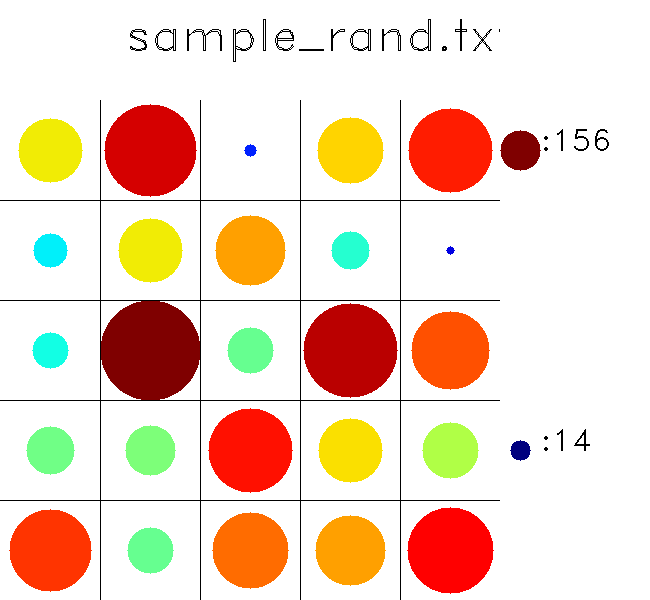

In [56]:
#@title 画像の枚数と撮影方向を指定 { display-mode: "form" }
#★本体の画像を作成★
import math
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

画像の総枚数 = 50#@param {type:"integer"}
一か所あたりの画像枚数 = 2 #@param {type:"integer"}
#@markdown 縦と横の調査した場所の数を入力
縦の調査場所数 = 5 #@param {type:"integer"}
横の調査場所数 = 5 #@param {type:"integer"}
#@markdown ※注：「画像の総枚数＝一か所あたりの画像枚数×縦の調査場所数×横の調査場所数」となるようにしてください
調査のスタート地点 = "左上から右" #@param ["左上から下", "右上から下", "左下から上", "右下から上","左上から右", "右上から左", "左下から右", "右下から左"]
調査の進んだ方向 = "\u5E73\u884C" #@param ["平行", "ジグザグ"]

x_range=縦の調査場所数
y_range=横の調査場所数

#白紙を作成
height = 100*縦の調査場所数
width = 100*横の調査場所数
imgsize=(height,width)
img_white = np.zeros((math.ceil(height),math.ceil(width), 3))
img_white += 255 #←全ゼロデータに255を足してホワイトにする

#分割する
y_step=int(imgsize[0]/x_range) #縦の分割間隔
x_step=int(imgsize[1]/y_range) #横の分割間隔
#小さいほうを半径とする
radius_point=min(int(y_step/2),int(x_step/2))
#円の中心
y_core=range(int(y_step/2),int(imgsize[0]),int(y_step))
x_core=range(int(x_step/2),int(imgsize[1]),int(x_step))

#ダニのデータの読み込み
read_folda_name='/content/original_txt/'
read_folda = sorted(os.listdir(read_folda_name))
txt_file = pd.read_csv(read_folda_name+read_folda[0],header=None, sep=" ")
#半径を計算
radius_list=np.zeros(int(math.ceil(画像の総枚数/一か所あたりの画像枚数)),dtype=np.int16)
for i in range(math.ceil(画像の総枚数/一か所あたりの画像枚数)):
 radius_list[i]=int(txt_file[i*一か所あたりの画像枚数:i*一か所あたりの画像枚数+一か所あたりの画像枚数][1].sum())
radius_max=max(radius_list)
radius_min=min(radius_list)


count=0
step=0
#巡行
if 調査の進んだ方向 == "平行":
  for i in y_core:
    for k in x_core:
      radius=int(int(radius_list[count])/radius_max*radius_point)
      color= [int(i * 255) for i in list(plt.cm.jet_r((radius_list[count]/radius_max))[0:3])]
      cv2.circle(img_white, (k, i),radius, color, thickness=-1)
      count=count+1
#ジグザグ
elif 調査の進んだ方向 == "ジグザグ":
  for i in y_core:
    if step % 2 == 0:
      for k in x_core:
        radius=int(int(radius_list[count])/radius_max*radius_point)
        color= [int(i * 255) for i in list(plt.cm.jet_r((radius_list[count]/radius_max))[0:3])]
        cv2.circle(img_white, (k, i),radius, color, thickness=-1)
        count=count+1
      step=step+1
    else:
      for k in reversed(x_core):
        radius=int(int(radius_list[count])/radius_max*radius_point)
        color= [int(i * 255) for i in list(plt.cm.jet_r((radius_list[count]/radius_max))[0:3])]
        cv2.circle(img_white, (k, i),radius, color, thickness=-1)
        count=count+1
      step=step+1

#オブジェクトimgのshapeメソッドの1つ目の戻り値(画像の高さ)をimg_yに、2つ目の戻り値(画像の幅)をimg_xに
img_y,img_x=img_white.shape[:2]  

#横線を引く：y_stepからimg_yの手前までy_stepおきに白い(BGRすべて255)横線を引く
img_white[y_step:img_y:y_step, :, :] = 0
#縦線を引く：x_stepからimg_xの手前までx_stepおきに白い(BGRすべて255)縦線を引く
img_white[:, x_step:img_x:x_step, :] = 0

#★回転処理★
if 調査のスタート地点 == "左上から右":
  img_white=img_white
elif 調査のスタート地点 == "右上から下":
  img_white=cv2.rotate(img_white, cv2.ROTATE_90_CLOCKWISE)
elif 調査のスタート地点 == "右下から左":
  img_white=cv2.rotate(img_white, cv2.ROTATE_180)
elif 調査のスタート地点 == "左下から上":
  img_white=cv2.rotate(img_white, cv2.ROTATE_90_COUNTERCLOCKWISE)
elif 調査のスタート地点 == "右上から左":
  img_white= cv2.flip(img_white, 1)
elif 調査のスタート地点 == "左上から下":
  img_white=cv2.rotate(img_white, cv2.ROTATE_90_CLOCKWISE)
  img_white= cv2.flip(img_white, 1)
elif 調査のスタート地点 == "右下から上":
  img_white=cv2.rotate(img_white, cv2.ROTATE_90_CLOCKWISE)
  img_white= cv2.flip(img_white, 0)
elif 調査のスタート地点 == "左下から右":
  img_white= cv2.flip(img_white, 0)

#★題名部分を作成して連結★
#白紙作成
height2, width = img_white.shape[:2]
height=100
imgsize=(height,width)
img_title = np.zeros((math.ceil(height),math.ceil(width), 3))
img_title += 255 #←全ゼロデータに255を足してホワイトにする

#タイトルを記載
text=read_folda[0]
org=(int(width/2-width/4),50)
cv2.putText(img_title, text, org, fontFace = cv2.FONT_HERSHEY_DUPLEX, fontScale = 0.3*(100*横の調査場所数/100), color = (0,0,0),lineType=cv2.LINE_AA)
#2つの画像を縦方向に連結
img_title_combine = cv2.vconcat([img_title, img_white])
#★凡例を作成して連結★
#白紙作成
height, width2 = img_title_combine.shape[:2]
width=150
imgsize=(height,width)
img_guide = np.zeros((math.ceil(height),math.ceil(width), 3))
img_guide += 255 #←全ゼロデータに255を足してホワイトにする
#凡例を作成
usage_guide_max=":"+str(radius_max)
cv2.putText(img_guide,usage_guide_max,(40,int(height/2-height/4)), fontFace = cv2.FONT_HERSHEY_DUPLEX, fontScale = 1, color = (0,0,0),lineType=cv2.LINE_AA)
color1= [int(i * 255) for i in plt.cm.jet_r(255)[0:3]]
cv2.circle(img_guide, (20,int(height/2-height/4)),20, color1, thickness=-1)

usage_guide_min=":"+str(radius_min)
cv2.putText(img_guide,usage_guide_min, (40,int(height/2+height/4)), fontFace = cv2.FONT_HERSHEY_DUPLEX, fontScale = 1, color = (0,0,0),lineType=cv2.LINE_AA)
color2= [int(i * 255) for i in plt.cm.jet_r(0)[0:3]]
cv2.circle(img_guide, (20,int(height/2+height/4)),10, color2, thickness=-1)
#cv2.imwrite("/content/test_guide.png",img_guide)
#2つの画像を縦方向に連結
img = cv2.hconcat([img_title_combine, img_guide])
#grid画像を保存
cv2.imwrite("/content/figure.png",img) 
#画像のインポート
cv2_imshow(img)

In [53]:
#@title 図をダウンロード { display-mode: "form" }
import shutil
import os
from google.colab import files

files.download('/content/figure.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#今後の開発の参考にしますのでアンケートへの回答をお願いします。
[アンケート記入先](https://forms.gle/QJ4P8dAD1LvzpZBE6)